<a href="https://colab.research.google.com/github/fellypesb/calc-num/blob/main/testes_funcoes_at_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Comparação entre métodos iterativos aplicados no cálculo de zero de funções**

Atividade desenvolvida durante as aulas de Cálculo Numérico ministrada pela prof. Dr. Helaine Furtado na Universidade Federal do Oeste do Pará (UFOPA).

- **Equipe:** 
        Almiriane Goulart  
        Davi Lima Rodrigues
        Fellype Siqueira Barroso
          

  
        

# **Teste de funções**
O teste de funções foi realizada a partir da classe `IterativeMethods()`. Nesta classe, encontra-se a implementação de 4 métodos iterativos:

- Método da Bissecção;
- Método de Newton;
- Método da Secante;
- Método do Ponto Fixo.

O construtor desta classe recebe 4 importantes parâmetros que são acessíveis a todos os métodos e que são definidos pelo estudo comparativo que desejamos realizar. São eles: função `f`, critério de erro `tol`, número máximo de iterações `maxiter`, casas decimais de precisão para os resultados `round_`.

In [1]:
import numpy as np

class IterativeMethods:
    '''
    Esta classe implementa 4 métodos iterativos que podem ser 
    utilizados para encontrar zeros de funções. 
    
    Parâmetros
    --------------
    f: lambda
        Função a qual irá ser utilizada em todos os métodos com 
        objetivo de encontrar suas raízes.

    tol: float
        Tolerância para critério de parada dos métodos.
        
    maxiter: int
        Número máximo de iterações desejadas.

    round_: int
         Número de casas decimais de precisão desejada.
         
    '''
    
    def __init__(self, f, tol:float, maxiter:int, round_:int):
        self.f = f
        self.tol = tol
        self.maxiter = maxiter
        self.round_ = round_
        
    def bisseccao(self, a, b, verbose=False):
        '''
            Função que calcula o zero de funções com o método da Bissecção.
            
            O processo iterativo deste método é realizado da seguinte forma:
            
            x = (a + b)/2

            Parâmetros
            --------------
            a: float
                Extremo esquerdo do intervalo de inspeção [a,b].

            b: float
                Extremo direito do intervalo de inspeção [a,b].

            verbose: bool, default=False
                Se True, o progresso das iterações é impresso na tela.

            Saída
            -----------
            dict contendo a quantidade de iterações necessárias para
            convergência, valor x^* e f(x^*) tal que f(x^*) é aprox. 0.
        '''
        
        if self.f(a)*self.f(b) > 0:
            raise ValueError("Não há raiz no intervalo fornecido.")

        iter_ = 0

        while(iter_ <= self.maxiter and round(abs(b - a), self.round_) > self.tol):
            x = round((a + b)/2, self.round_)      

            f_a = round(self.f(a), self.round_)
            f_b = round(self.f(b), self.round_)
            f_x = round(self.f(x), self.round_)

            product = round((f_a * f_x), self.round_)
            if(product > 0):
                a = x
            else:
                b = x

            iter_ += 1
            if verbose:
                print(f'Iteração: {iter_} \t f(a): {f_a} \t f(b): {f_b} \t f(x): {f_x} \t Aproximação: {x}')
        if iter_ > self.maxiter:
            print("Número máximo de iterações alcançado!")
        else:
            return {'iter':iter_, 'raiz':x, 'f(x)':round(self.f(x), self.round_)}
    
    def fixedpoint(self, x0, g, verbose=False):
        '''
            Função que calcula o zero de funções com o método do Ponto Fixo.
            O processo iterativo é realizado da seguinte forma:

            x = g(x)

            Parâmetros
            --------------
            x0: float
                Chute inicial.

            g: lambda
                Função alcançada apartir de f(x).
                Ex: f(x) = xe^x-1
                    g(x) = 1/e^x

            verbose: bool, default=False
                Se True, o progresso das iterações é impresso na tela.

            Saída
            -----------
            dict contendo a quantidade de iterações necessárias para
            convergência, valor x^* e f(x^*) tal que f(x^*) é aprox. 0.
        '''
        
        iter_ = 0 
        while( iter_ <= self.maxiter and round(abs(self.f(x0)), self.round_) > self.tol):
            x0 = round(g(x0), self.round_)
            iter_ += 1
            if verbose:
                print(f'Iterações: {iter_} \t Aproximação: {x0}') 
        if iter_ > self.maxiter:
            print("Número máximo de iterações alcançado!")
        else:
            return {'iter':iter_, 'raiz':x0, 'f(x)':round(self.f(x0), self.round_)}
        
    def newton(self, x0, df, verbose=False):
        '''
            Função que calcula o zero de funções com o método de Newton.
            O processo iterativo é realizado da seguinte forma:

            x = x - f(x)/f'(x)

            Parâmetros
            --------------
            x0: float
                Chute inicial.

            df: lambda
                Derivada da função a qual queremos encontrar suas raízes.

            verbose: bool, default=False
                Se True, o progresso das iterações é impresso na tela.

            Saída
            -----------
            dict contendo a quantidade de iterações necessárias para
            convergência, valor x^* e f(x^*) tal que f(x^*) é aprox. 0.
        '''
        
        iter_ = 0 
        while( iter_ <= self.maxiter and round(abs(self.f(x0)), self.round_) > self.tol):

            x0 = round(x0 - (self.f(x0)/df(x0)), self.round_)
            iter_ += 1
            if verbose:
                 print(f'Iterações: {iter_} \t Aproximação: {x0}') 
        if iter_ > self.maxiter:
            print("Número máximo de iterações alcançado!")
        else:
            return {'iter':iter_, 'raiz':x0, 'f(x)':round(self.f(x0), self.round_)}
        
    def secant(self, x0, x1, verbose=False):
        '''
            Função que calcula o zero de funções com o método da Secante.
            
            O método iterativo é realizado da Seguinte forma:

            x1 = (x0*f(x1) - x1*f(x0)) / (f(x1) - f(x0))  

            Parametros
            --------------
            x0: float
                Primeiro chute inicial.

            x1: float
                Segundo chute inicial.

            verbose: bool, default=False
                Se True, o progresso das iterações é impresso na tela.

            Saída
            -----------
            dict contendo a quantidade de iterações necessárias para convergência
            e valor x, tal que f(x) é aprox. 0.
        '''
        iter_ = 0

        while( iter_ <= self.maxiter and round(abs(self.f(x1)), self.round_) > self.tol):
            c = x1
            x1 = round((x0*self.f(x1) - x1*self.f(x0)) / (self.f(x1) - self.f(x0)), self.round_)
            x0 = c
            iter_ += 1
            if verbose:
                print(f'Iterações: {iter_} \t Aproximação: {x1}')

        if iter_ > self.maxiter:
            print("Número máximo de iterações alcançado!")
        else:
            return {'iter':iter_, 'raiz': x1, 'f(x)':round(self.f(x1), self.round_)}


Definiu-se que para todos os testes que serão realizados a seguir  o número de casas decimais `round_ = 14` e o número máximo de iterações `maxiter = 40`. 

# **Função de teste 1**

$f(x) = e^{-x^2} - \cos x$

$\varepsilon = 10^{-7}$









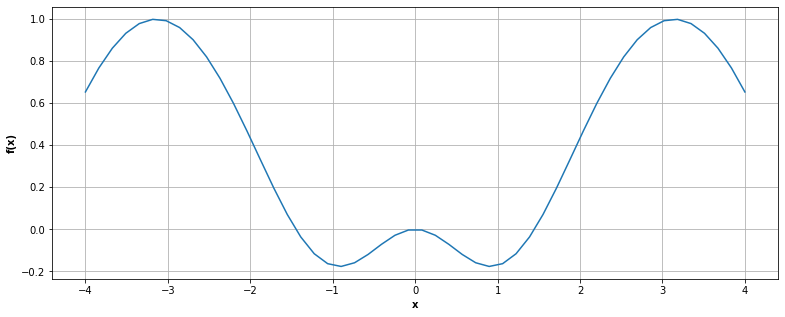

In [2]:
# Plot do gráfico da função de estudo 1.

import matplotlib.pyplot as plt

function  = lambda x: np.exp(-x**2) - np.cos(x)

x = np.linspace(-4,4)
plt.figure(figsize=(13,5))
plt.plot(x, function(x))
plt.xlabel('x', weight='bold')
plt.ylabel('f(x)', weight='bold')
plt.grid()
plt.show()

Ao analisar o gráfico é possível observar várias raízes da função. Uma dessas raízes se encontra no intervalo entre $[1, 2]$ ou mais precisamente entre o intervalo $[1; 1,5]$, utilizaremos essa informação para ser explorada pelos métodos iterativos abaixo, na tentativa de aproximação do valor $x^*$, isto é, o zero da função. 

In [3]:
# Teste da função 1 pelos métodos iterativos.

f = lambda x:np.exp(-x**2)-np.cos(x)
df = lambda x: -2*x*np.exp(-x**2)+np.sin(x)
g1 = lambda x: np.cos(x) + x - np.exp(-x**2) # Converge lentamente - 13 iterações
g2 = lambda x: x + 1/0.6*(-np.exp(-x**2)+np.cos(x)) # Converge rapidamente - 5 iterações 

metodo = IterativeMethods(f=f, tol=1e-7, round_=14, maxiter=40)

bisseccao = metodo.bisseccao(a=1, b=1.5)
newton = metodo.newton(x0=1.5, df=df)
secante = metodo.secant(x0=1, x1=1.5)
pontoFixo = metodo.fixedpoint(x0=1.5, g=g2)

In [4]:
# Visualização em formato tabular dos resultados obtidos para a função 1.

import pandas as pd

pd.options.display.precision = 14
results = pd.DataFrame({'Bissecção':bisseccao, 'Newton':newton, 'Secante':secante, 'Ponto Fixo': pontoFixo})

results.rename(index={'iter':'Iterações', 'raiz':'Aproximação'}).T

,Iterações,Aproximação,f(x)
Bissecção,23.0,1.44741421937942,-0.00000003302604
Newton,3.0,1.44741427129931,0.00000000000196
Secante,4.0,1.44741424993837,-0.00000001358646
Ponto Fixo,5.0,1.44741420734217,-0.00000004068334


Ao analisar os resultados obtidos podemos perceber que o método da bisseccão foi o mais lento e menos preciso. Enquanto que, os demais métodos atingiram a convergência em menos de 10 iterações. O método de Newton, foi o método mais rápido e preciso, pois necessitou da menor quantidade de iterações e o valor de $f(x^*)$ mais próximo de zero. 

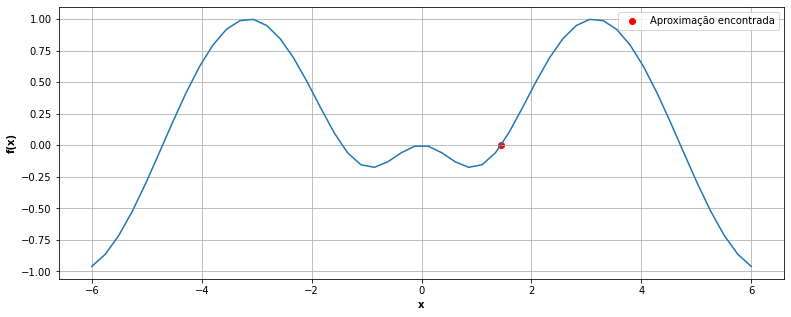

In [5]:
# Plot da função de estudo 1 com a aproximação encontrada pelos métodos.

import matplotlib.pyplot as plt

function  = lambda x: np.exp(-x**2) - np.cos(x)

x = np.linspace(-6,6)
plt.figure(figsize=(13,5))
plt.plot(x, function(x))
plt.scatter(1.44741427129931,0, label='Aproximação encontrada', c='r')
plt.xlabel('x', weight='bold')
plt.ylabel('f(x)', weight='bold')
plt.legend()
plt.grid()
plt.show()

# **Função de teste 2**

$f(x) = x^3 - x - 1$

$\varepsilon = 10^{-5}$

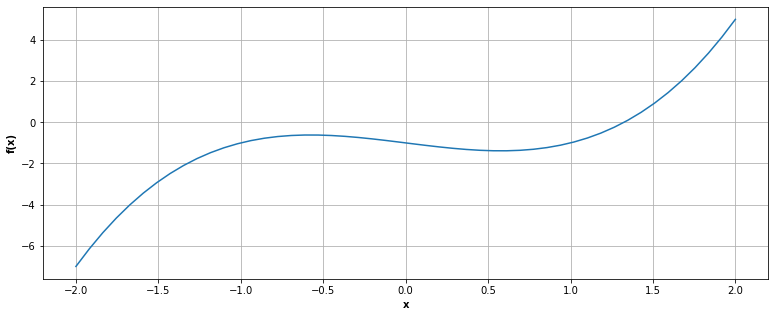

In [6]:
# Plot do gráfico da função de estudo 2

import matplotlib.pyplot as plt

function  = lambda x: x**3 - x - 1

x = np.linspace(-2,2)
plt.figure(figsize=(13,5))
plt.plot(x, function(x))
plt.xlabel('x', weight='bold')
plt.ylabel('f(x)', weight='bold')
plt.grid()
plt.show()

Ao analisar o gráfico acima podemos observar a existência de uma raíz localizada no intervalo $[0; 1,5]$ para esta função. Essa informação será utilizada pelos métodos a seguir.

In [7]:
# Teste da função 2 pelos métodos iterativos

f = lambda x: x**3 - x - 1
df = lambda x: 3*x**2 - 1

g1 = lambda x: x**3 - 1 # Overflow erro no arredondamento
g2 = lambda x: (x + 1)**1/3 # não converge
g3 = lambda x: 1/x**2 - 1  # divisão por zero
g4 = lambda x: ((1/x)+1)**0.5 # converge em 9 iterações


metodo = IterativeMethods(f=f, tol=1e-5, round_=14, maxiter=40)

bisseccao = metodo.bisseccao(a=0, b=1.5)
newton = metodo.newton(x0=0, df=df)
secante = metodo.secant(x0=0, x1=0.5)
pontoFixo = metodo.fixedpoint(x0=0.5, g=g4)

In [8]:
# Visualização em formato tabular dos resultados para função de estudo 2.

import pandas as pd

pd.options.display.precision = 14
results = pd.DataFrame({'Bissecção':bisseccao, 'Newton':newton, 'Secante':secante, 'Ponto Fixo': pontoFixo})

results.rename(index={'iter':'Iterações', 'raiz':'Aproximação'}).T

,Iterações,Aproximação,f(x)
Bissecção,18.0,1.32471656799317,-0.00000592464044
Newton,20.0,1.32471878861526,0.00000354549288
Secante,26.0,1.32471794706667,-0.00000004340576
Ponto Fixo,9.0,1.32471948003467,0.00000649414938


Para esta função o método da Secante foi o mais lento necessitando de 26 iterações para atingir a convergência. O método do Ponto Fixo foi o mais rápido de todos e necessitou de apenas 9 iterações. Apesar do método da Secante ter sido o método mais lento o valor da sua $f(x^*)$ foi o mais próxima de zero tendo encontrado, portanto, a aproximação mais precisa.

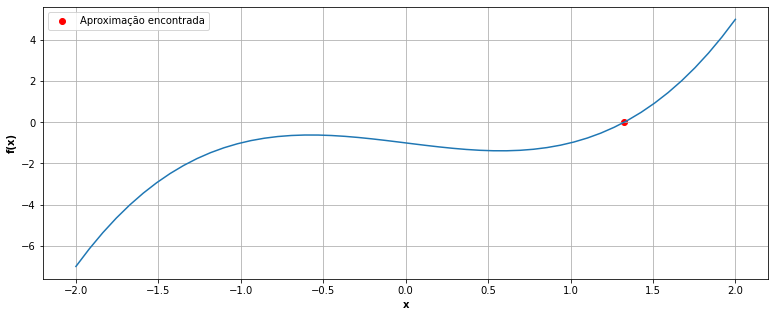

In [9]:
# Plot do gráfico da função de estudo 2 e a aproximação encontrada pelos métodos.

import matplotlib.pyplot as plt

function  = lambda x: x**3 - x - 1

x = np.linspace(-2,2)
plt.figure(figsize=(13,5))
plt.plot(x, function(x))
plt.scatter(1.32471794706667, 0, label='Aproximação encontrada', c='r')
plt.xlabel('x', weight='bold')
plt.ylabel('f(x)', weight='bold')
plt.legend()
plt.grid()
plt.show()

# **Função de teste 3**

$f(x) = x^3-9x+2$  

$\varepsilon = 10^{-10}$

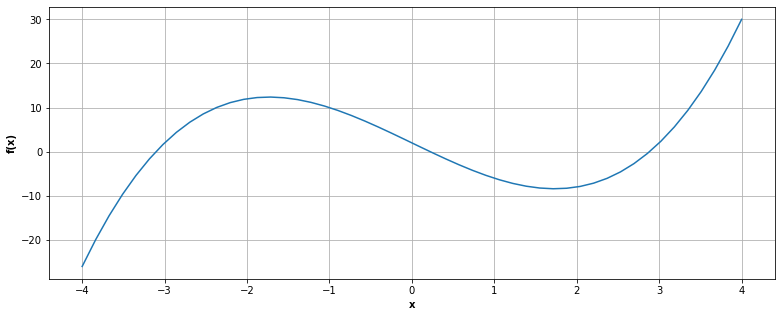

In [10]:
# Plot do gráfico da função de estudo 3

function = lambda x: x**3 - 9*x + 2

x = np.linspace(-4,4)

plt.figure(figsize=(13, 5))
plt.plot(x, function(x))
plt.xlabel('x', weight='bold')
plt.ylabel('f(x)', weight='bold')
plt.grid()
plt.show()

Ao analisar o gráfico da função de estudo 3 (três) podemos visualizar a presença de 3 (três) raízes, isto é corente, pois trata-se de uma raíz cúbica. Uma dessas raízes está localizada no intervalo entre $[0, 1]$. Sabendo disso, buscou-se encontrar o valor $x^*$ por meio dessa informação e utilizando os métodos iterativos a seguir.

In [11]:
# Teste da função de estudo 3 pelos métodos iterativos

f = lambda x: x**3 - 9*x + 2
df = lambda x: 3*x**2 - 9

g1 = lambda x: (x**3 + 2)/9 # converge em 6 iterações
g2 = lambda x: - 2/(x**2 - 9) # converge em 6 iterações com maior precisão
g3 = lambda x: (9*x - 2)**1/3 # não converge
g4 = lambda x: (9-2/x)**1/2 # ocorre divisão por zero

metodo = IterativeMethods(f=f, tol=1e-10, maxiter=40, round_=14)

bisseccao = metodo.bisseccao(a=0, b=1)
newton = metodo.newton(x0=0, df=df)
secante = metodo.secant(x0=-0.5, x1=0)
pontoFixo = metodo.fixedpoint(x0=0, g=g2)

In [12]:
# Visualização em formato tabular dos resultados para a função de estudo 3

import pandas as pd

pd.options.display.precision = 14
results = pd.DataFrame({'Bissecção':bisseccao, 'Newton':newton, 'Secante':secante, 'Ponto Fixo': pontoFixo})

results.rename(index={'iter':'Iterações', 'raiz':'Aproximação'}).T

,Iterações,Aproximação,f(x)
Bissecção,34.0,0.22346206387737,0.00000006895952
Newton,3.0,0.22346207166923,0.00000000000005
Secante,4.0,0.22346207166933,-0.00000000000084
Ponto Fixo,6.0,0.22346207166902,0.00000000000191


Dentre os 4 (quatro) métodos o mais lento e menos preciso foi o da bissecção, como pode ser observado acima. Esse método necessitou de um grande número de iterações para atingir a convergência 34 (trinta e quatro), enquanto que os demais necessitaram de menos de 10 iterações para convergir. O método de Newton assim como para a primeira função foi o método mais rápido e preciso obtendo $f(x^*)$ mais próximo de zero.

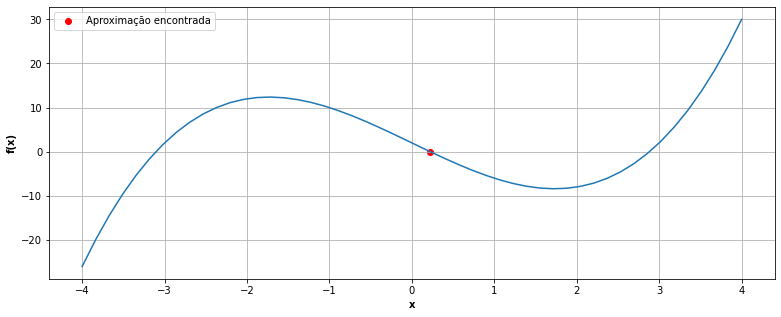

In [13]:
# Plot do gráfico da função de estudo 3 e a aproximação encontrada pelos métodos

function = lambda x: x**3 - 9*x + 2

x = np.linspace(-4,4)

plt.figure(figsize=(13, 5))
plt.plot(x, function(x))
plt.scatter(0.22346207166923, 0, label='Aproximação encontrada', c='r')
plt.xlabel('x', weight='bold')
plt.ylabel('f(x)', weight='bold')
plt.legend()
plt.grid()
plt.show()

# **Considerações finais**

Podemos observar que em dois dos testes realizados o método da bissecção foi o mais lento com necessidade de um grande número de iterações para alcançar a convergência. Em dois teste (função 1 e função 3) o método de Newton foi o mais rápido e preciso de todos necessitando de apenas 3 iterações para convergência. Em apenas um teste (função 2) o método da Secante não foi eficiente, nos demais sempre esteve entre os métodos maís rápidos, porém, sendo inferior ao método de Newton. O método do ponto fixo demonstrou bom desempenho com poucas iterações e assim como o método de Newton em nenhum dos testes resultou no pior desempenho.

Vale ressaltar que os resultados obtidos são estritamente condicionados aos valores de entrada fornecidos para cada um dos métodos não sendo possível, dessa forma, realizar qualquer tipo de afirmação categórica ou conclusão definitiva acerca da eficiência dos métodos iterativos abordados. 